<a href="https://colab.research.google.com/github/Rohitkumar1011/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREDICTING THE TEN YEAR RISK OF DEVELOPING HEART DISEASE USING MACHINE LEARNING**

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import warnings 
warnings.filterwarnings('ignore')

Data Collection and Processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the csv data to a Pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Datasets/Data_cardiovascular_risk.csv')

**2.Dataset**


The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

**Attributes:**


**Demographic:**

*   Sex: male or female(Nominal)
*   Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)


**Education: no further information provided**

**Behavioral:**

*   Current Smoker: whether or not the patient is a current smoker (Nominal)
*   Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)


**Information on medical history:**

*   BP Meds: whether or not the patient was on blood pressure medication (Nominal)
*   Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

*   Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
*   Diabetes: whether or not the patient had diabetes (Nominal)



**Information on current medical condition:**

*   Tot Chol: total cholesterol level (Continuous)
*   Sys BP: systolic blood pressure (Continuous)

*   Dia BP: diastolic blood pressure (Continuous)
*   BMI: Body Mass Index (Continuous)

*   Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
*   Glucose: glucose level (Continuous)


**Target variable to predict:**

10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)





















In [ ]:
# print first 5 rows of the dataset
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
data.shape

(3390, 17)

In [ ]:
# Dropping Education column which is not relevant
data.drop('education', axis =1 , inplace = True)

In [ ]:
# Reset index
data.set_index('id', inplace = True)

In [ ]:
#Converting categorical column to numeric.
data = pd.get_dummies(data, columns=['sex','is_smoking']) 

In [ ]:
# Dropping columns
data.drop(['sex_F','is_smoking_NO'], axis =1, inplace = True)

In [ ]:
# Rename into single gender
data.rename(columns = {'sex_M':'male','is_smoking_YES':'is_smoking'}, inplace =True)

In [ ]:
data = data[['age','male','is_smoking','cigsPerDay','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','BPMeds','diaBP','BMI','glucose','heartRate','TenYearCHD']]


In [ ]:
# print last 5 rows of the dataset
data.head()

,age,male,is_smoking,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BPMeds,diaBP,BMI,glucose,heartRate,TenYearCHD
id,,,,,,,,,,,,,,,
0,64,0,1,3.0,0,0,0,221.0,148.0,0.0,85.0,NaN,80.0,90.0,1
1,36,1,0,0.0,0,1,0,212.0,168.0,0.0,98.0,29.77,75.0,72.0,0
2,46,0,1,10.0,0,0,0,250.0,116.0,0.0,71.0,20.35,94.0,88.0,0
3,50,1,1,20.0,0,1,0,233.0,158.0,0.0,88.0,28.26,94.0,68.0,1
4,64,0,1,30.0,0,0,0,241.0,136.5,0.0,85.0,26.42,77.0,70.0,0


In [ ]:
# number of rows and columns in the dataset
data.shape

(3390, 15)

In [ ]:
# statistical measures about the data
data.describe()

,age,male,is_smoking,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BPMeds,diaBP,BMI,glucose,heartRate,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3368.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3346.000000,3390.000000,3376.000000,3086.000000,3389.000000,3390.000000
mean,49.542183,0.432743,0.497640,9.069477,0.006490,0.315339,0.025664,237.074284,132.60118,0.029886,82.883038,25.794964,82.086520,75.977279,0.150737
std,8.592878,0.495529,0.500068,11.879078,0.080309,0.464719,0.158153,45.247430,22.29203,0.170299,12.023581,4.115449,24.244753,11.971868,0.357846
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,0.000000,48.000000,15.960000,40.000000,45.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,0.000000,74.500000,23.020000,71.000000,68.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,0.000000,82.000000,25.380000,78.000000,75.000000,0.000000
75%,56.000000,1.000000,1.000000,20.000000,0.000000,1.000000,0.000000,264.000000,144.00000,0.000000,90.000000,28.040000,87.000000,83.000000,0.000000
max,70.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,696.000000,295.00000,1.000000,142.500000,56.800000,394.000000,143.000000,1.000000


In [ ]:
# getting some info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   male             3390 non-null   uint8  
 2   is_smoking       3390 non-null   uint8  
 3   cigsPerDay       3368 non-null   float64
 4   prevalentStroke  3390 non-null   int64  
 5   prevalentHyp     3390 non-null   int64  
 6   diabetes         3390 non-null   int64  
 7   totChol          3352 non-null   float64
 8   sysBP            3390 non-null   float64
 9   BPMeds           3346 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3376 non-null   float64
 12  glucose          3086 non-null   float64
 13  heartRate        3389 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(5), uint8(2)
memory usage: 377.4 KB


In [ ]:
# checking for missing values
data.isnull().sum()

age                  0
male                 0
is_smoking           0
cigsPerDay          22
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
BPMeds              44
diaBP                0
BMI                 14
glucose            304
heartRate            1
TenYearCHD           0
dtype: int64

There are lots of Missing values in this dataset which needs to be treated.

**3. Exploratory Data Analysis**


**3.1 Missing values**

Handling missing data is important as many machine learning algorithms do not support data with missing values.

In [ ]:
# Total Percentage of missing data:

missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 12.48%


In [ ]:
# percentage of missing data per category

total = data.isnull().sum().sort_values(ascending=False)
percent_total = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,304,8.967552
BPMeds,44,1.297935
totChol,38,1.120944
cigsPerDay,22,0.648968
BMI,14,0.412979
heartRate,1,0.029499


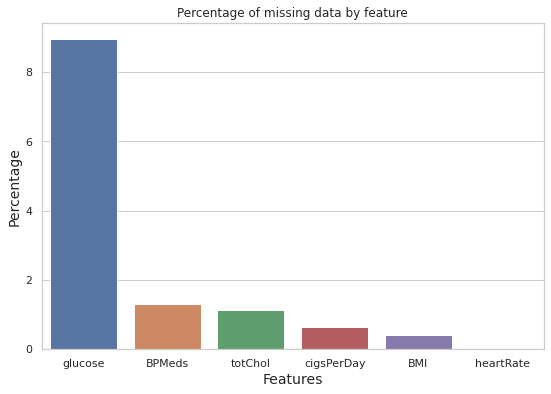

In [ ]:
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

We will use this plot when we need more data to increase accuracy.

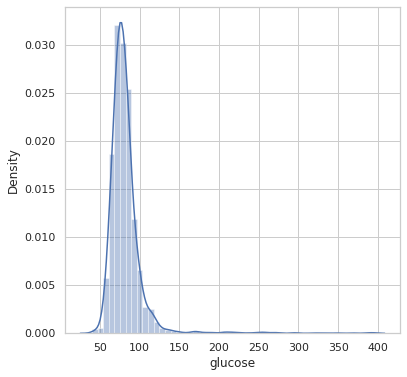

In [ ]:
# analyse the distribution of data in the glucose
fig, ax = plt.subplots(figsize = (6,6))
sns.distplot(data.glucose)

In [ ]:
data['glucose'].fillna(data['glucose'].median(), inplace = True)

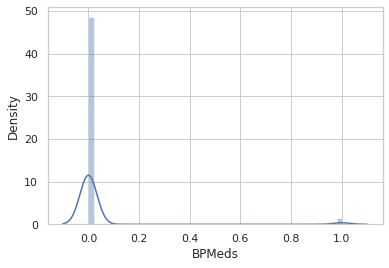

In [ ]:
sns.distplot(data.BPMeds)

In [ ]:
data['BPMeds'].fillna(data['BPMeds'].median(), inplace = True)

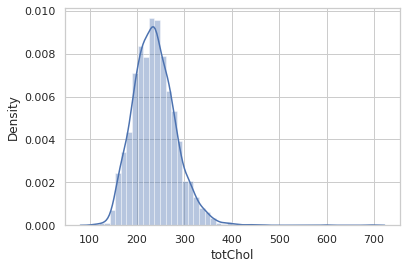

In [ ]:
sns.distplot(data.totChol)

In [ ]:
data['totChol'].fillna(data['totChol'].median(), inplace = True)

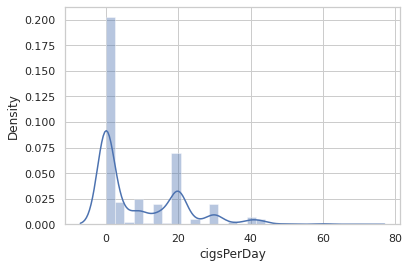

In [ ]:
sns.distplot(data.cigsPerDay)

In [ ]:
data['cigsPerDay'].fillna(data['cigsPerDay'].median(), inplace = True)

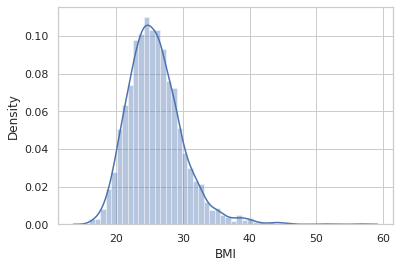

In [ ]:
sns.distplot(data.BMI)

In [ ]:
data['BMI'].fillna(data['BMI'].median(), inplace = True)

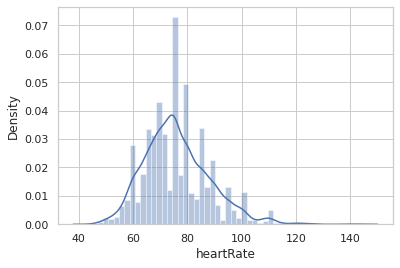

In [ ]:
sns.distplot(data.heartRate)

In [ ]:
data['heartRate'].fillna(data['heartRate'].median(), inplace = True)

At 8.97%, the blood glucose entry has the highest percentage of missing data. The otherfeatures have very few missing entries.

Since the missing entries account for only 15% of the total data we can drop these entries without losing alot of data.

In [ ]:
total1 = data.isnull().sum()
total1

age                0
male               0
is_smoking         0
cigsPerDay         0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
BPMeds             0
diaBP              0
BMI                0
glucose            0
heartRate          0
TenYearCHD         0
dtype: int64

In [ ]:
data.shape

(3390, 15)

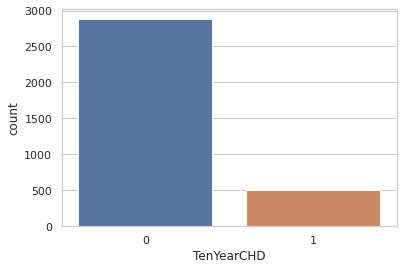

There are 2879 patients without heart disease and 511 patients with the disease


In [ ]:
sns.countplot(x='TenYearCHD',data=data)
plt.show()
cases = data.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

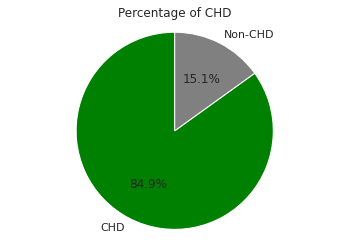

In [ ]:
mylabels = ["CHD","Non-CHD"]
mycolors = ["green","grey"]
plt.pie(cases, labels = mylabels, colors = mycolors, startangle = 90, autopct='%1.1f%%' )
plt.axis('equal')
plt.title("Percentage of CHD")
plt.show()

The data is not properly balanced as the number of people without the disease greately exceeds the number of people with the disease. The ratio is about 1:5.57

**3.3 Categorical variable comparisons**

In [ ]:
from operator import add

In [ ]:
def stacked_barchart(data, title = None, ylabel = None, xlabel = None):
    default_colors = ['#008080', '#5f3c41', '#219AD8']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    # Plot
    barWidth = 0.95
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()
        
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 20))

    for item in ([ax.title]):
        item.set_fontsize(27)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')


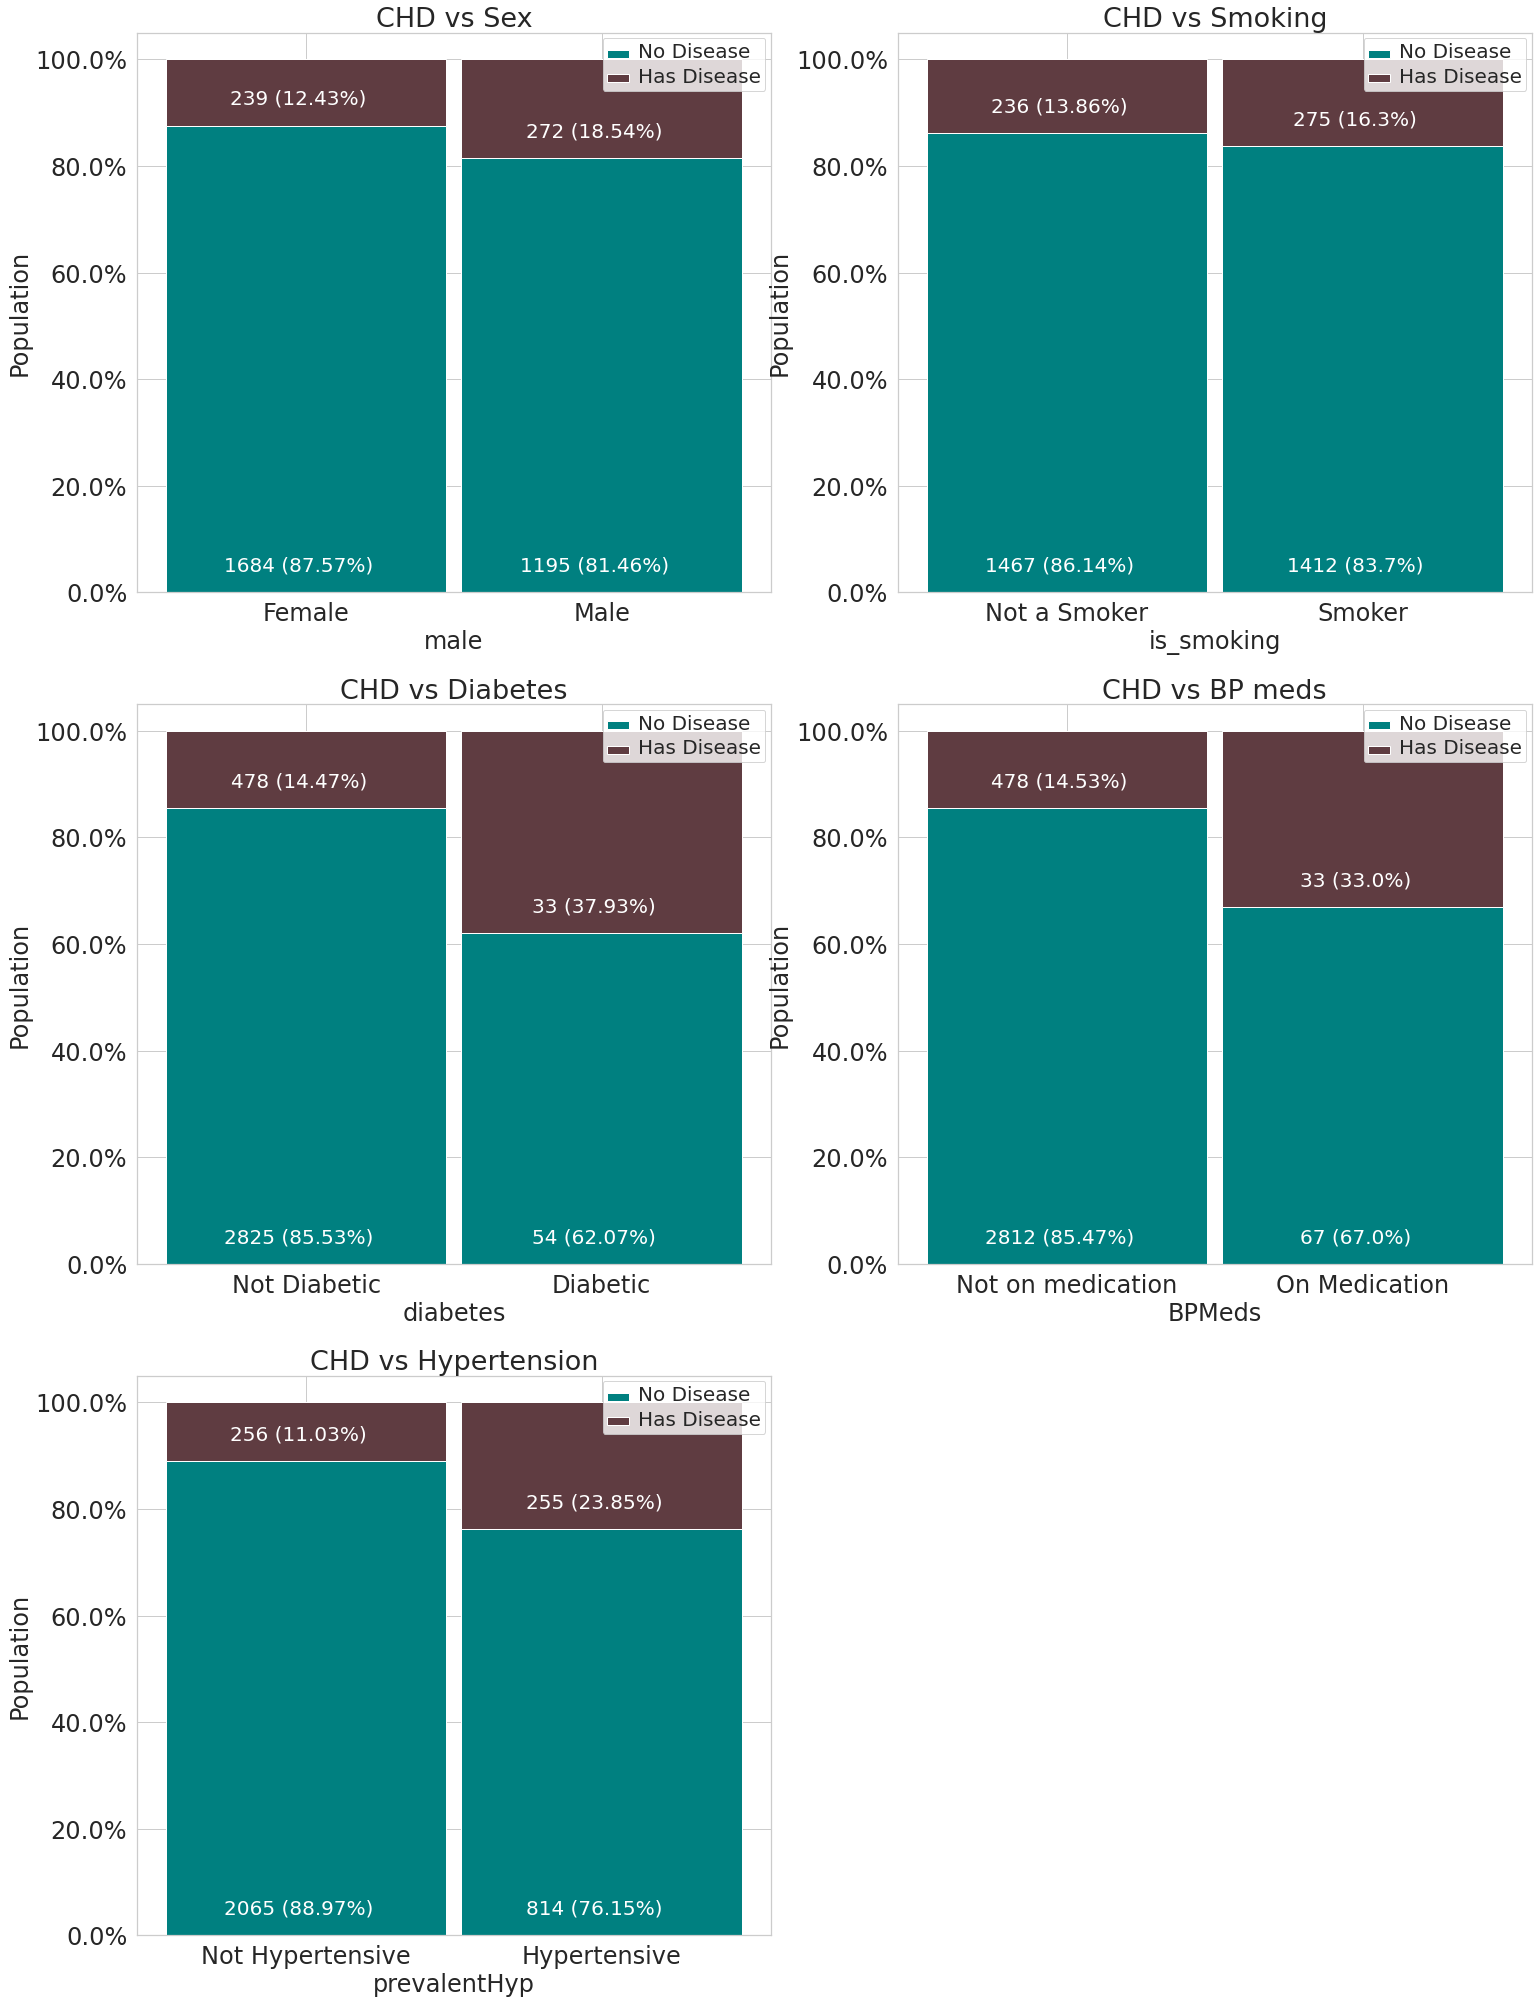

In [ ]:
fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 3
grid_cols = 2

#draw sex vs disease outcome
plt.subplot(grid_rows, grid_cols, 1)
temp = data[['male','TenYearCHD']].groupby(['male','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Sex', ylabel = 'Population')

#draw smoking satus vs disease outcome
plt.subplot(grid_rows, grid_cols, 2)
temp = data[['is_smoking','TenYearCHD']].groupby(['is_smoking','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not a Smoker', 1:'Smoker'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Smoking', ylabel = 'Population')

#draw diabetes vs disease outcome
plt.subplot(grid_rows, grid_cols, 3)
temp = data[['diabetes','TenYearCHD']].groupby(['diabetes','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Diabetic', 1:'Diabetic'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Diabetes', ylabel = 'Population')

#draw BP meds vs disease outcome
plt.subplot(grid_rows, grid_cols, 4)
temp = data[['BPMeds','TenYearCHD']].groupby(['BPMeds','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not on medication', 1:'On Medication'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs BP meds', ylabel = 'Population')

#draw Hypertension vs disease outcome
plt.subplot(grid_rows, grid_cols, 5)
temp = data[['prevalentHyp','TenYearCHD']].groupby(['prevalentHyp','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Hypertensive', 1:'Hypertensive'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Hypertension', ylabel = 'Population')

Due to the imbalanced nature of the dataset it is difficult to make conclusions but based on what is observed but these are the conclusions that can be drawn:

*   Slightly more males are suffering from CHD than females
*   The percentage of people who have CHD is almost equal between smokers and non smokers


*   The percentage of people who have CHD is higher among the diabetic, and those with prevalent hypertesion as compared to those who dont have similar morbidities
*   A larger percentage of the people who have CHD are on blood pressure medication





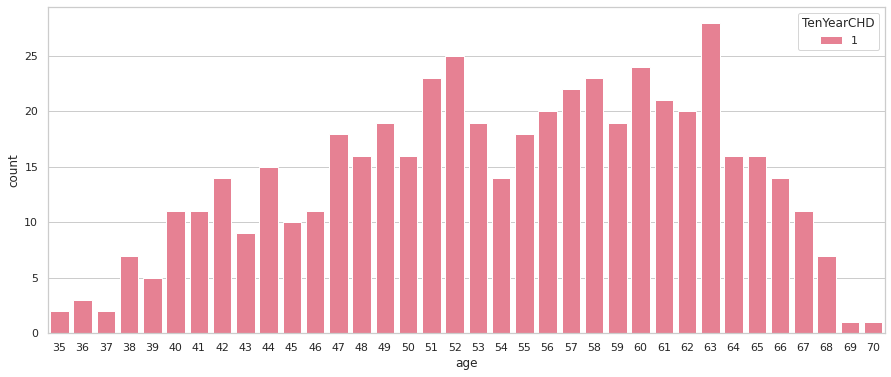

In [ ]:
positive_cases = data[data['TenYearCHD'] == 1]
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = positive_cases, hue = 'TenYearCHD', palette='husl')
plt.show()

The people with the highest risk of developing CHD are betwwen the ages of 51 and 63

The number of sick people generally increases with age

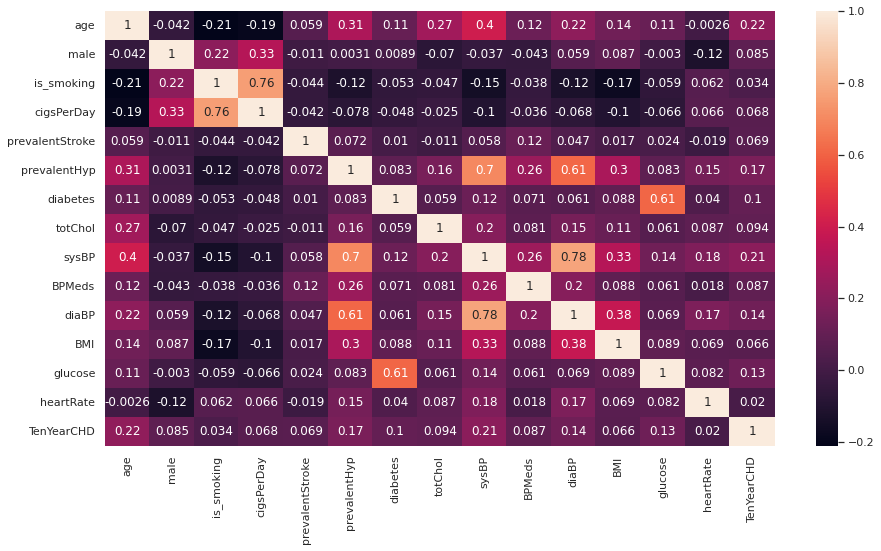

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

There are no features with more than 0.5 correlation with the Ten year risk of developing CHD and this shows that the features a poor predictors. However the features with the highest correlations are age, prevalent hypertension and systolic blood pressure

Also there are a couple of features that are highly correlated with one another and it makes no sense to use both of them in building a machine learning model. These incluse: Blood glucose and diabetes (obviously); systolic and diastolic blood pressures; cigarette smoking and the number of cigarretes smoked per day. Therefore we need to carry out feature selection to pick the best features

**4. Feature Selection**

In [ ]:
!pip install boruta
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 3.2 MB/s 


In [ ]:
#define the features
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
 
# find all relevant features
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration:

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=28, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7F08B2722D10),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F08B2722D10, verbose=2)

In [ ]:
# show the most important features
most_important = data.columns[:-1][feat_selector.support_].tolist()
most_important

['age', 'sysBP']

We see that age and systolic blood pressures are selected as the most important features for predicting the Ten year risk of developing CHD.

However we will use the six most important features to build our models

In [ ]:
# select the top 6 features
top_features = data.columns[:-1][feat_selector.ranking_ <=6].tolist()
top_features

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose', 'heartRate']

The top features are:



*   Age
*   Total Cholestrol

*   Systolic blood pressure

*   Diastolic blood pressure
*   BMI


*   Heart rate

*   Blood glucose










**4.1  Statistics on the top features**

In [ ]:
import statsmodels.api as sm

In [ ]:
X_top = data[top_features]
y = data['TenYearCHD']

In [ ]:
res = sm.Logit(y,X_top).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.412827
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3390
Model:                          Logit   Df Residuals:                     3383
Method:                           MLE   Df Model:                            6
Date:                Tue, 31 May 2022   Pseudo R-squ.:                 0.02632
Time:                        05:38:12   Log-Likelihood:                -1399.5
converged:                       True   LL-Null:                       -1437.3
Covariance Type:            nonrobust   LLR p-value:                 2.804e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0219      0.006      3.652      0.000       0.010       0.034
totChol       -0.0023      0.001     -2.029      0.042      -0.004   -7.76e-05
sysBP          0.0244      0.003      7.104      0.000       0.018       0.031
diaBP         -0.0279      0.006     -4.577      0.000      -0.040      -0.016
BMI           -0.0589      0.013     -4.678      0.000      -0.084      -0.034
glucose        0.0052      0.002      2.929      0.003       0.002       0.009
heartRate     -0.0285      0.004     -7.404      0.000      -0.036      -0.021
==============================================================================
"""

In [ ]:
params = res.params
conf = res.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                 5%       95%  Odds Ratio
age        1.010194  1.034217    1.022135
totChol    0.995518  0.999922    0.997718
sysBP      1.017860  1.031684    1.024748
diaBP      0.960968  0.984187    0.972508
BMI        0.919783  0.966340    0.942774
glucose    1.001715  1.008685    1.005194
heartRate  0.964575  0.979250    0.971885


 **5.Models and predictions**

Since the dataset is imbalanced i.e for every positive case there are about 6 negative cases. We may end up with a classifier that is biased to the negative cases. The classifier may have a high accuracy but poor a precision and recall. To adress this we will balance the dataset using the Synthetic Minority Oversampling Technique (SMOTE).

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [ ]:
X = data[top_features]
y = data.iloc[:,-1]

In [ ]:
# the numbers before SMOTE
num_before = dict(Counter(y))

#perform SMOTE

# define pipeline
over = SMOTE(sampling_strategy=.9)
under = RandomUnderSampler(sampling_strategy=.9)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after SMOTE
num_after =dict(Counter(y_smote))

In [ ]:
print(num_before, num_after)

{1: 511, 0: 2879} {0: 2878, 1: 2591}


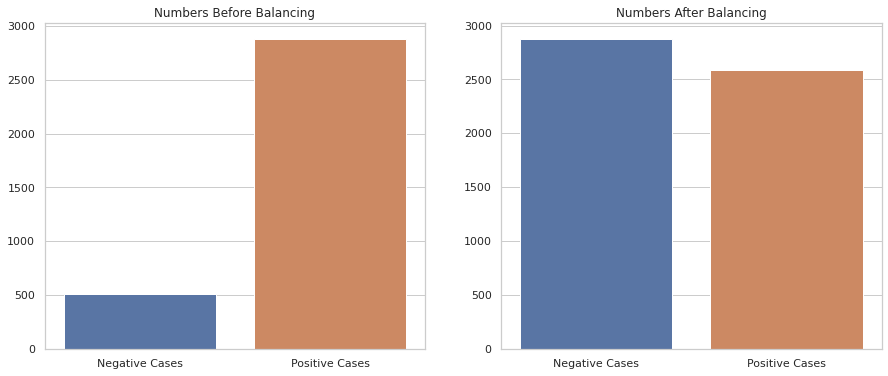

In [ ]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

After applying SMOTE, the new dataset is much more balanced: the new ratio between negative and positive cases is 1:1.2 up from 1:5.57

**5.2 Splitting data to Training and Testing set**

In [ ]:
# new dataset
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']
new_data.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,43,234.0,173.0,96.0,27.99,76.0,100.0,0
1,60,318.0,132.0,75.5,18.87,82.0,105.0,0
2,57,281.0,192.0,105.0,27.04,75.0,64.0,0
3,45,238.0,127.5,83.5,27.73,78.0,90.0,0
4,59,235.0,136.0,96.0,28.61,85.0,54.0,0


In [ ]:
X_new = new_data[top_features]
y_new= new_data.iloc[:,-1]
X_new.head()

,age,totChol,sysBP,diaBP,BMI,glucose,heartRate
0,43,234.0,173.0,96.0,27.99,100.0,76.0
1,60,318.0,132.0,75.5,18.87,105.0,82.0
2,57,281.0,192.0,105.0,27.04,64.0,75.0
3,45,238.0,127.5,83.5,27.73,90.0,78.0
4,59,235.0,136.0,96.0,28.61,54.0,85.0


In [ ]:
# split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)

**5.3 Feature Scaling**

Feature scaling is a method used to normalize the range of independent variables or features of data. It generally speeds up the running time of different algorithms

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

**5.4 Models**

The four algorithms that will be used are:

*   Logistic Regression
*   k-Nearest Neighbours
*   Decision Trees
*   Support Vector Machine












In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [ ]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],                                                  # c : Inverse of regularization strength
         'C':[0.01,0.1,1,10,100],                                                 # penalty : which Regularization to use. 
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [ ]:
#train the classifier
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_

{'C': 0.01, 'class_weight': None, 'penalty': 'l2'}

In [ ]:
#make predictions
logistic_predict = logistic_clf.predict(X_test)

In [ ]:
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 62.89%


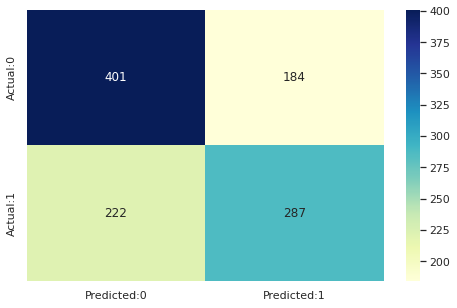

In [ ]:
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.64      0.69      0.66       585
           1       0.61      0.56      0.59       509

    accuracy                           0.63      1094
   macro avg       0.63      0.62      0.62      1094
weighted avg       0.63      0.63      0.63      1094



In [ ]:
logistic_f1 = f1_score(y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The f1 score for logistic regression is 58.57%


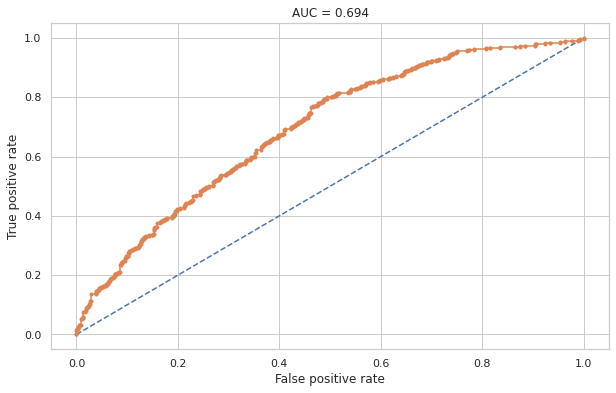

In [ ]:
# ROC curve and AUC 
probs = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

Area under curve = .703

5.4.2 k-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [ ]:
# train the model
knn_clf.fit(X_train,y_train)
knn_clf.best_params_

{'n_neighbors': 1}

In [ ]:
# predictions
knn_predict = knn_clf.predict(X_test)

In [ ]:
#accuracy
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

Using k-nearest neighbours we get an accuracy of 83.36%


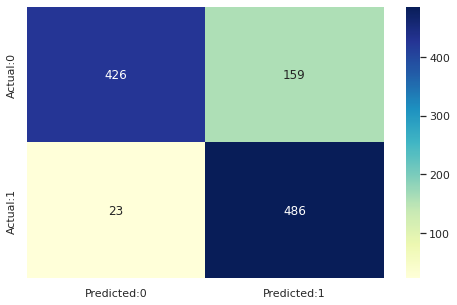

In [ ]:
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.95      0.73      0.82       585
           1       0.75      0.95      0.84       509

    accuracy                           0.83      1094
   macro avg       0.85      0.84      0.83      1094
weighted avg       0.86      0.83      0.83      1094



In [ ]:
knn_f1 = f1_score(y_test, knn_predict)
print(f'The f1 score for K nearest neignbours is {round(knn_f1*100,2)}%')

The f1 score for K nearest neignbours is 84.23%


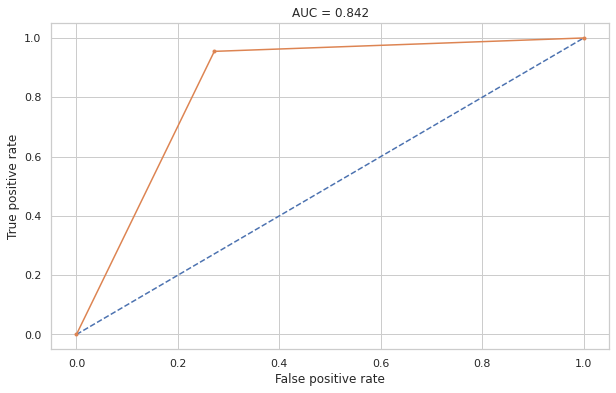

In [ ]:
# ROC curve and AUC 
probs = knn_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()

**5.4.3 Decision Trees**


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [ ]:
# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [ ]:
# train the model
tree_clf.fit(X_train,y_train)
tree_clf.best_params_

{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}

In [ ]:
# predictions
tree_predict = tree_clf.predict(X_test)

In [ ]:
#accuracy
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Trees we get an accuracy of 75.59%


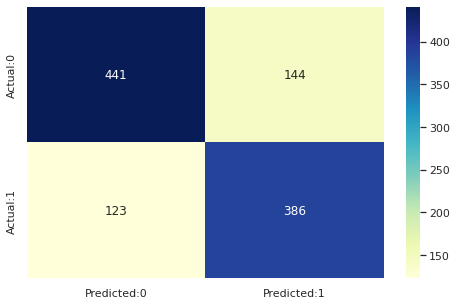

In [ ]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       585
           1       0.73      0.76      0.74       509

    accuracy                           0.76      1094
   macro avg       0.76      0.76      0.76      1094
weighted avg       0.76      0.76      0.76      1094



In [ ]:
tree_f1 = f1_score(y_test, tree_predict)
print(f'The f1 score Descision trees is {round(tree_f1*100,2)}%')

The f1 score Descision trees is 74.3%


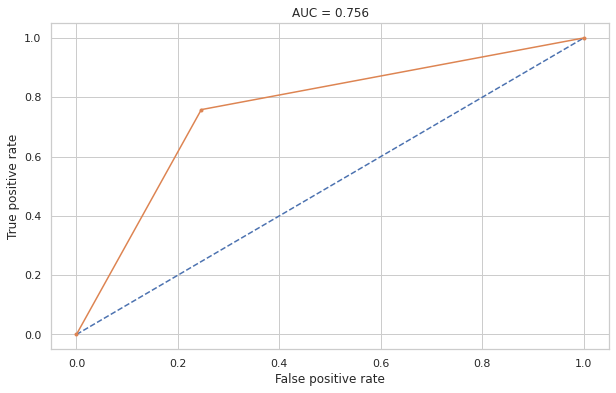

In [ ]:
# ROC curve and AUC 
probs = tree_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
tree_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(tree_auc,3)}")
plt.show()

**5.4.4 Support Vector Machine**


In [ ]:
from sklearn.svm import SVC

In [ ]:
#grid search for optimum parameters                                                 # Hyperparameter Tuning
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [ ]:
# train the model
svm_clf.fit(X_train,y_train)
svm_clf.best_params_ 

{'C': 10, 'gamma': 1}

In [ ]:
# predictions
svm_predict = svm_clf.predict(X_test)

In [ ]:
#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")

Using SVM we get an accuracy of 85.01%


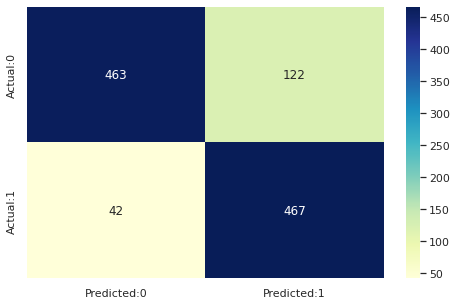

In [ ]:
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       585
           1       0.79      0.92      0.85       509

    accuracy                           0.85      1094
   macro avg       0.85      0.85      0.85      1094
weighted avg       0.86      0.85      0.85      1094



In [ ]:
svm_f1 = f1_score(y_test, svm_predict)
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')

The f1 score for SVM is 85.06%


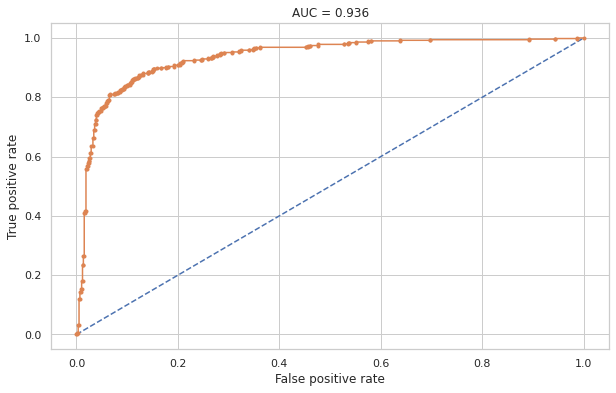

In [ ]:
# ROC curve and AUC 
probs = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svm_auc,3)}")
plt.show()

In [ ]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'AUC':log_auc, 'F1 score':logistic_f1},
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'AUC':knn_auc, 'F1 score':knn_f1},
    "Decision trees":{'Accuracy':tree_accuracy, 'AUC':tree_auc, 'F1 score':tree_f1},
    "Support vector machine":{'Accuracy':svm_accuracy, 'AUC':svm_auc, 'F1 score':svm_f1}
}).T

In [ ]:
comparison

,Accuracy,AUC,F1 score
Logistic regression,0.628885,0.694403,0.585714
K-nearest neighbours,0.833638,0.841509,0.842288
Decision trees,0.755941,0.756098,0.743022
Support vector machine,0.850091,0.935820,0.850638


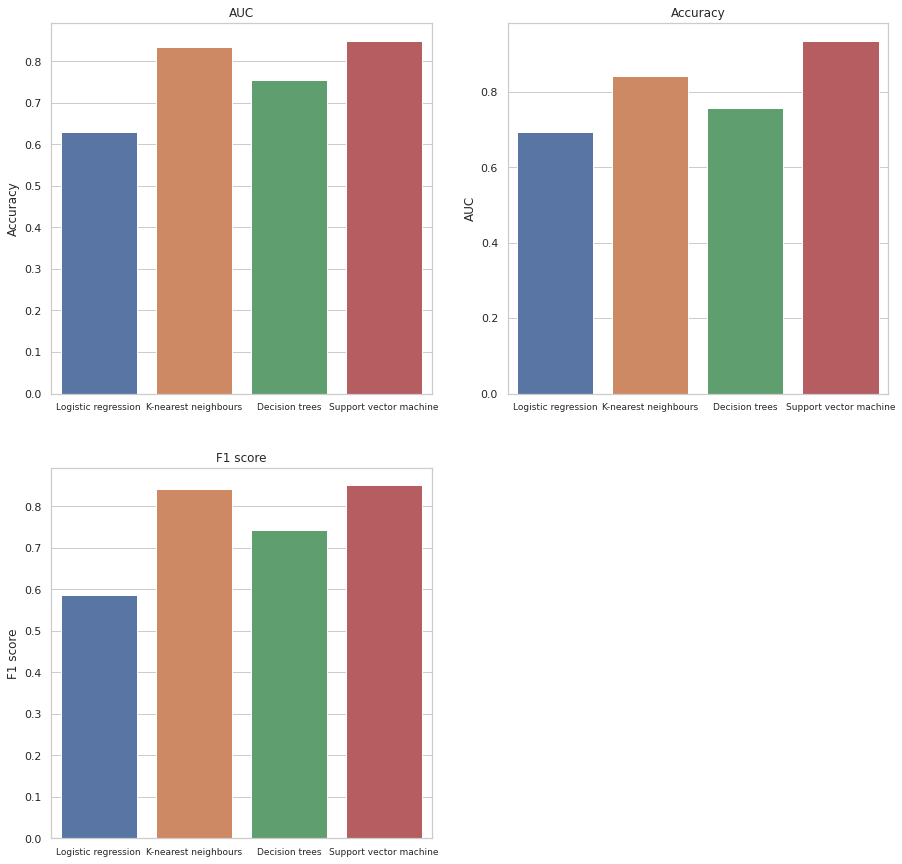

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['AUC','Accuracy','F1 score']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=9)
    plt.title(titles[title])
plt.show()

**5.5 Cross validation score of the best model**












  

In [ ]:
 from sklearn.model_selection import cross_val_score

In [ ]:
cv_results = cross_val_score(svm_clf, X, y, cv=5) 

print (f"Cross-validated scores {cv_results}")
print(f"The Cross Validation accuracy is: {round(cv_results.mean() * 100,2)}%")

Cross-validated scores [0.8480826  0.84955752 0.84955752 0.84955752 0.84955752]
The Cross Validation accuracy is: 84.93%
